- This is a side-project that will be pasted into the CombinedPull notebook when it works
- I'm iterating here for now until I can get it to work right

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
from pathlib import Path

In [9]:
from pathlib import Path
folder = Path.cwd() / "Contact_Parks"
print(folder)                 # prints the path you created
print(folder.is_absolute())   # True/False
print(Path.cwd())             # current working directory
print(folder.resolve(strict=False))  # resolved absolute path (won't error)
print(folder.exists())   # True if file/dir exists
print(folder.is_dir())   # True if it's an existing directory

c:\Users\Drew.Quinton\Documents\GitHub\NPS-Emerging-Mobility\WZDx\Contact_Parks
True
c:\Users\Drew.Quinton\Documents\GitHub\NPS-Emerging-Mobility\WZDx
C:\Users\Drew.Quinton\Documents\GitHub\NPS-Emerging-Mobility\WZDx\Contact_Parks
True
True


In [10]:
folder = Path.cwd() / "Contact_Parks"

parks_to_contact_df = pd.concat(
    [pd.read_csv(f, parse_dates=['date']) for f in folder.iterdir() if f.suffix.lower() == ".csv"],
    ignore_index=True
    )

parks_to_contact_df.head()

,id,url,title,park alpha,description,category,relatedRoadEvents,LastIndexedDate,park,region,alpha,State,Road Closed Flag,date
0,71F660F3-4349-41BB-9E5A-45F519FFF4D9,NaN,Norris Geyser Basin Closed,YELL,"Norris Geyser Basin, including all boardwalks,...",Park Closure,[],00:00.0,Yellowstone National Park,IMR,YELL,"ID,MT,WY",yes,2025-10-23
1,8B622055-8E8A-4C6B-BE90-8D5893C2F331,NaN,White Sands National Park Open to the Public,WHSA,White Sands National Park is now open from 9:0...,Park Closure,[],00:00.0,White Sands National Park,IMR,WHSA,NM,yes,2025-10-23
2,1E8B414E-27B9-435C-9B7F-FAFD86B96E54,NaN,Pierce Stocking Scenic Drive Temporarily Close...,SLBE,The 7.4-mile one-way loop is closed due to uns...,Park Closure,[],00:00.0,Sleeping Bear Dunes National Lakeshore,MWR,SLBE,MI,yes,2025-10-23
3,8A5D7467-9F35-4FB8-A035-AE9DA6039BA9,https://www.nps.gov/dino/learn/news/quarryexhi...,Quarry Exhibit Hall Temporary Closure,DINO,"The Quarry Exhibit Hall ""Wall of Bones"" is tem...",Park Closure,[],00:00.0,Dinosaur National Monument,IMR,DINO,"CO,UT",yes,2025-10-23
4,238A4176-5720-4AD2-A0BC-9BF3C469459B,NaN,Baker Creek Prescribed Fire Area Closure,GRBA,"The Baker Creek area, including Baker Creek Ro...",Park Closure,[],00:00.0,Great Basin National Park,PWR,GRBA,NV,yes,2025-10-23


In [ ]:

pivot = pd.pivot_table(
    parks_to_contact_df,
    index = 'alpha',
    columns = 'date',
    values = 'Road Closed Flag',
    aggfunc='count',
    fill_value = 0
    )
pivot

date,2025-10-23,2025-11-05,2025-12-11
alpha,,,
ABLI,1,1,0
ANJO,1,1,0
BIBE,1,1,1
BISO,1,1,1
BITH,1,1,1
...,...,...,...
WHSA,2,1,1
WICA,1,1,1
YELL,2,1,1


In [34]:
grouped_by_month = parks_to_contact_df.groupby(parks_to_contact_df['date'].dt.to_period('M')).agg({'alpha': 'nunique'})
grouped_by_month

,alpha
date,
2025-10,84
2025-11,81
2025-12,79


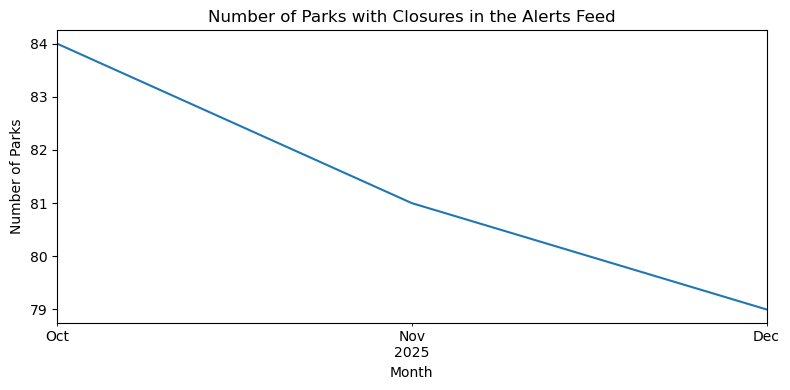

In [44]:
ax = grouped_by_month['alpha'].plot(kind='line', figsize=(8,4))
ax.set_xlabel('Month')
ax.set_ylabel('Number of Parks')
ax.set_title('Number of Parks with Closures in the Alerts Feed')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()